In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
import pandas as pd
import tensorflow

In [2]:
data = np.loadtxt('shuffled_protein_features.csv', skiprows=1, delimiter=' ')
training_data = data[:,0:-1]
ids = data[:,-1]

In [3]:
x = []
for i in range(0, 120):
    MIN = np.min(training_data[:,i])
    MAX = np.max(training_data[:,i])
    scale = (training_data[:,i]-MIN)/(MAX-MIN)
    x.append(scale)
x = np.array(x)
x = x.T

X_train, X_test, y_train, y_test = train_test_split(x, ids, test_size=0.05, random_state=2024)

from tensorflow import keras
AE = keras.models.load_model("/Users/rahuldey/Downloads/KTD/protein/AE_protein_new.h5")
encoder = keras.models.Model(inputs = AE.input, outputs=AE.get_layer("dense_3").output)
print(encoder.summary())

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 68)             │         8,228 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 8)              │           264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2)              │            18 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,718 (41.87 KB)

 Trainable params: 10,718 (41.87 KB)

 Non-trainable params: 0 (0.00 B)

None


In [4]:
output = encoder.predict(X_train)

535/535 ━━━━━━━━━━━━━━━━━━━━ 0s 238us/step


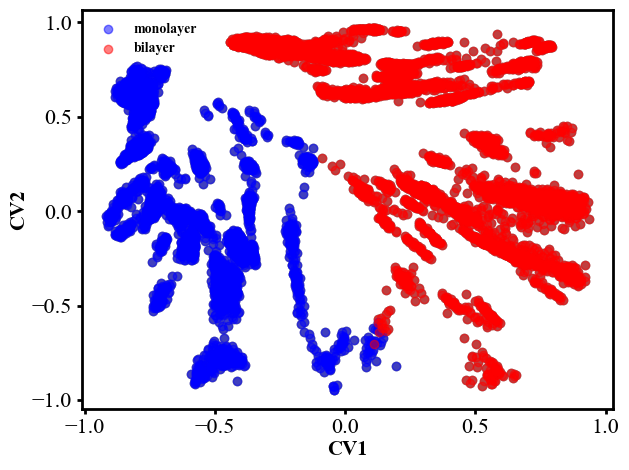

In [10]:
mask0 = y_train == 0
mask1 = y_train == 1
fig, ax = plt.subplots()

plt.scatter(output[:,0],output[:,1],color="grey",alpha=1)
plt.scatter(output[:,0][mask0],output[:,1][mask0],label="monolayer",alpha=0.5,color="blue")
plt.scatter(output[:,0][mask1],output[:,1][mask1],label="bilayer",alpha=0.5,color="red")

plt.legend(loc='upper left', prop={'weight': 'bold'}, frameon=False)

plt.rcParams.update({'font.sans-serif':'Times New Roman'})
csfont = {'fontname':'Times New Roman'}

ax.tick_params(axis='both', which='major', width=2, labelsize=16)
ax.tick_params(axis='both', which='minor', width=1, labelsize=16)

ax.set_xlabel("CV1", fontsize=14)
ax.set_ylabel("CV2", fontsize=14)

ax.spines['top'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)

ax.set_xlabel(r'CV1', labelpad=2, fontsize = 15, fontweight='bold')
ax.set_ylabel(r'CV2', labelpad=2, fontsize = 15, fontweight='bold')

plt.tight_layout()
plt.savefig('latent_space.png', dpi=500)